In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

Завантаження датасету

In [114]:
data = pd.read_csv('museum_visitors.csv')

Виведення перших 5 рядків

In [115]:
print(data.head())

         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


Попередній аналіз даних

In [116]:
print(f'Розмір датасету: {data.shape}')
print(f'Типи даних:\n{data.dtypes}')
print(f'Кількість пропусків:\n{data.isnull().sum()}')

Розмір датасету: (59, 5)
Типи даних:
Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object
Кількість пропусків:
Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


Перевірка наявноті дублікатів та їх видалення

In [117]:
data = data.drop_duplicates()
print(f'Розмір таблиці без дублікатів: {data.shape}')

Розмір таблиці без дублікатів: (59, 5)


Отримання інформації про роки

In [118]:
data['Date'] = pd.to_datetime(data['Date'])
years = data['Date'].dt.year.unique()
print(f'Роки, що містяться в датасеті: {years}')

Роки, що містяться в датасеті: [2014 2015 2016 2017 2018]


Зміна назви стовпців

In [119]:
data.columns = ['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

Обчислення середньої кількості відвідувачів для кожного музею

In [120]:
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
avg_visitors_per_museum = data[museum_columns].mean()
print(avg_visitors_per_museum)

avila_adobe                             24061.661017
firehouse_museum                         6472.830508
chinese_american_museum                  2721.254237
america_tropical_interpretive_center     7107.016949
dtype: float64


Знаходження мінімальної та максимальної кількості відвідувачів для кожного музею за 2018 рік

In [121]:
data_2018 = data[data['date'].dt.year == 2018]
min_visitors_2018 = data_2018.min()
max_visitors_2018 = data_2018.max()
print(f'Мінімальна кількість відвідувачів у 2018 році:\n{min_visitors_2018}')
print(f'Максимальна кількість відвідувачів у 2018 році:\n{max_visitors_2018}')

Мінімальна кількість відвідувачів у 2018 році:
date                                    2018-01-01 00:00:00
avila_adobe                                           14718
firehouse_museum                                       3306
chinese_american_museum                                2146
america_tropical_interpretive_center                   3180
dtype: object
Максимальна кількість відвідувачів у 2018 році:
date                                    2018-11-01 00:00:00
avila_adobe                                           25173
firehouse_museum                                       8013
chinese_american_museum                                4960
america_tropical_interpretive_center                   5837
dtype: object


Визначення місяців з найвищою та найнижчою загальною кількістю відвідувачів для 2015 року

In [122]:
data_2015 = data[data['date'].dt.year == 2015]
total_visitors_2015 = data_2015.groupby(data_2015['date'].dt.month)[['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']].sum()
highest_month_2015 = total_visitors_2015.idxmax().apply(lambda x: calendar.month_name[int(x)])
lowest_month_2015 = total_visitors_2015.idxmin().apply(lambda x: calendar.month_name[int(x)])

# Виводимо результат
print(f'Місяць з найвищою кількістю відвідувачів у 2015 році:\n{highest_month_2015}')
print(f'\nМісяць з найнижчою кількістю відвідувачів у 2015 році:\n{lowest_month_2015}')

Місяць з найвищою кількістю відвідувачів у 2015 році:
avila_adobe                             July
firehouse_museum                         May
chinese_american_museum                  May
america_tropical_interpretive_center     May
dtype: object

Місяць з найнижчою кількістю відвідувачів у 2015 році:
avila_adobe                              February
firehouse_museum                         February
chinese_american_museum                 September
america_tropical_interpretive_center     February
dtype: object


Порівняння кількості відвідувачів музею "Avila Adobe" у літні та зимові місяці 2018 року

In [123]:
summer_visitors_2018 = data_2018[(data_2018['date'].dt.month >= 6) & (data_2018['date'].dt.month <= 8)]['avila_adobe'].sum()
winter_visitors_2018 = data_2018[((data_2018['date'].dt.month >= 12) | (data_2018['date'].dt.month <= 2))]['avila_adobe'].sum()
print(f'Кількість відвідувачів музею "Avila Adobe" у літні місяці 2018 року: {summer_visitors_2018}')
print(f'Кількість відвідувачів музею "Avila Adobe" у зимові місяці 2018 року: {winter_visitors_2018}')

Кількість відвідувачів музею "Avila Adobe" у літні місяці 2018 року: 66122
Кількість відвідувачів музею "Avila Adobe" у зимові місяці 2018 року: 30983


Знаходження кореляції між кількістю відвідувачів в кожному з музеїв та датами у 2016 році

In [124]:
data_2016 = data[data['date'].dt.year == 2016]
correlation_2016 = data_2016.corr()
print(f'Кореляція у 2016 році:\n{correlation_2016}')

Кореляція у 2016 році:
                                          date  avila_adobe  firehouse_museum  \
date                                  1.000000     0.060350         -0.201650   
avila_adobe                           0.060350     1.000000          0.737200   
firehouse_museum                     -0.201650     0.737200          1.000000   
chinese_american_museum              -0.415031     0.089054          0.553935   
america_tropical_interpretive_center -0.228172     0.436561          0.247389   

                                      chinese_american_museum  \
date                                                -0.415031   
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
date                  

Візуалізація даних

Побудова теплокарти кореляції

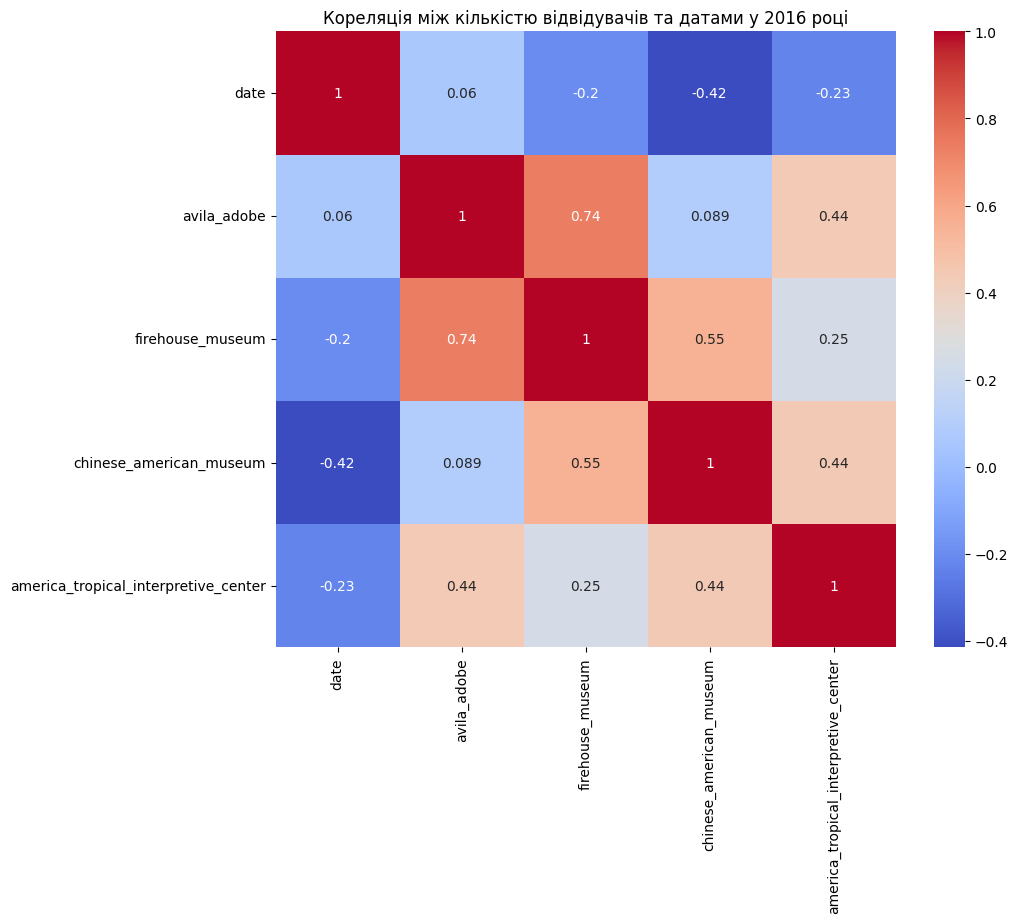

In [125]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_2016, annot=True, cmap='coolwarm')
plt.title('Кореляція між кількістю відвідувачів та датами у 2016 році')
plt.show()

Побудуова графіку ліній для кожного музею в 2017 році

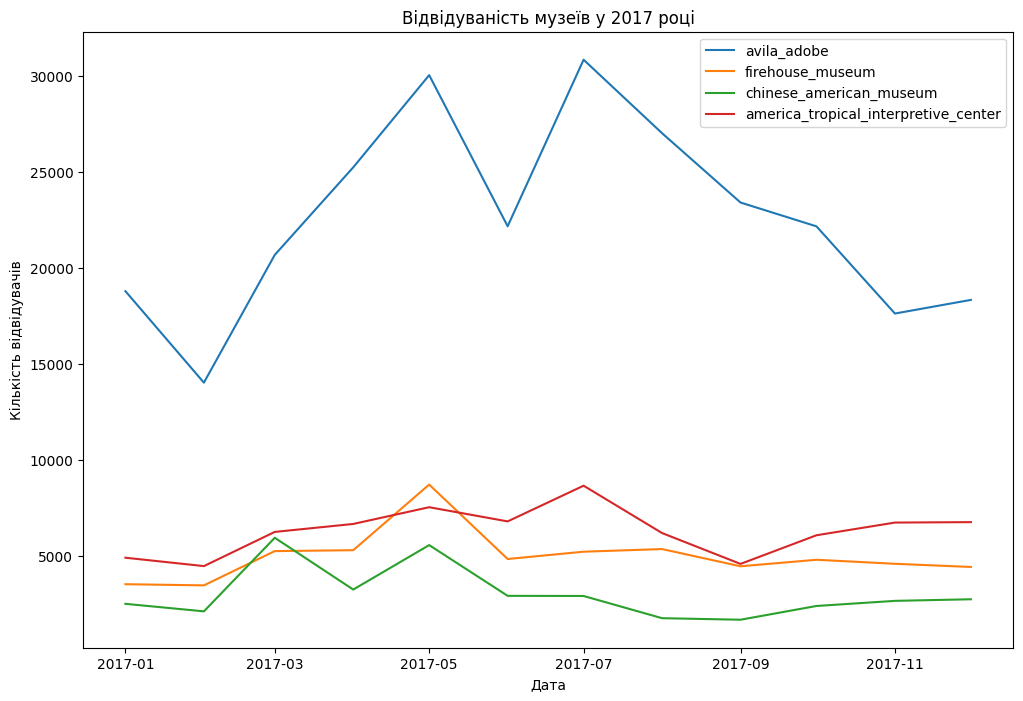

In [126]:
data_2017 = data[data['date'].dt.year == 2017]
plt.figure(figsize=(12, 8))
for museum in data.columns[1:]:
    plt.plot(data_2017['date'], data_2017[museum], label=museum)

plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Відвідуваність музеїв у 2017 році')
plt.legend()
plt.show()

Побудова графіків розсіювання для кожного музею за 2018 рік

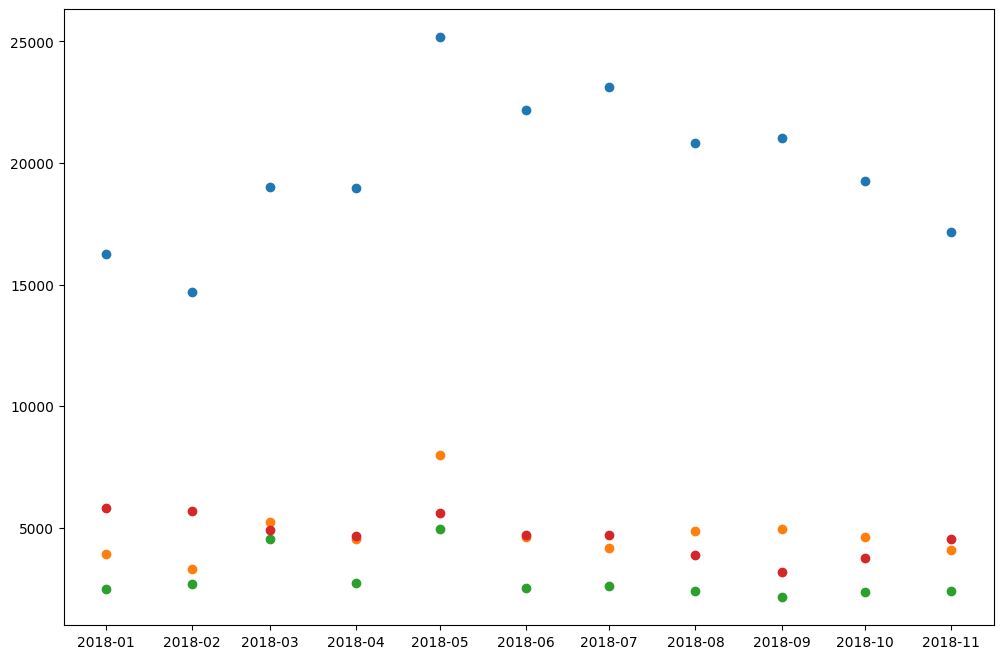

In [127]:
plt.figure(figsize=(12, 8))
for museum in data.columns[1:]:
    plt.scatter(data_2018['date'], data_2018[museum])

Гістограма відвідуваності за місяцями кожного музею

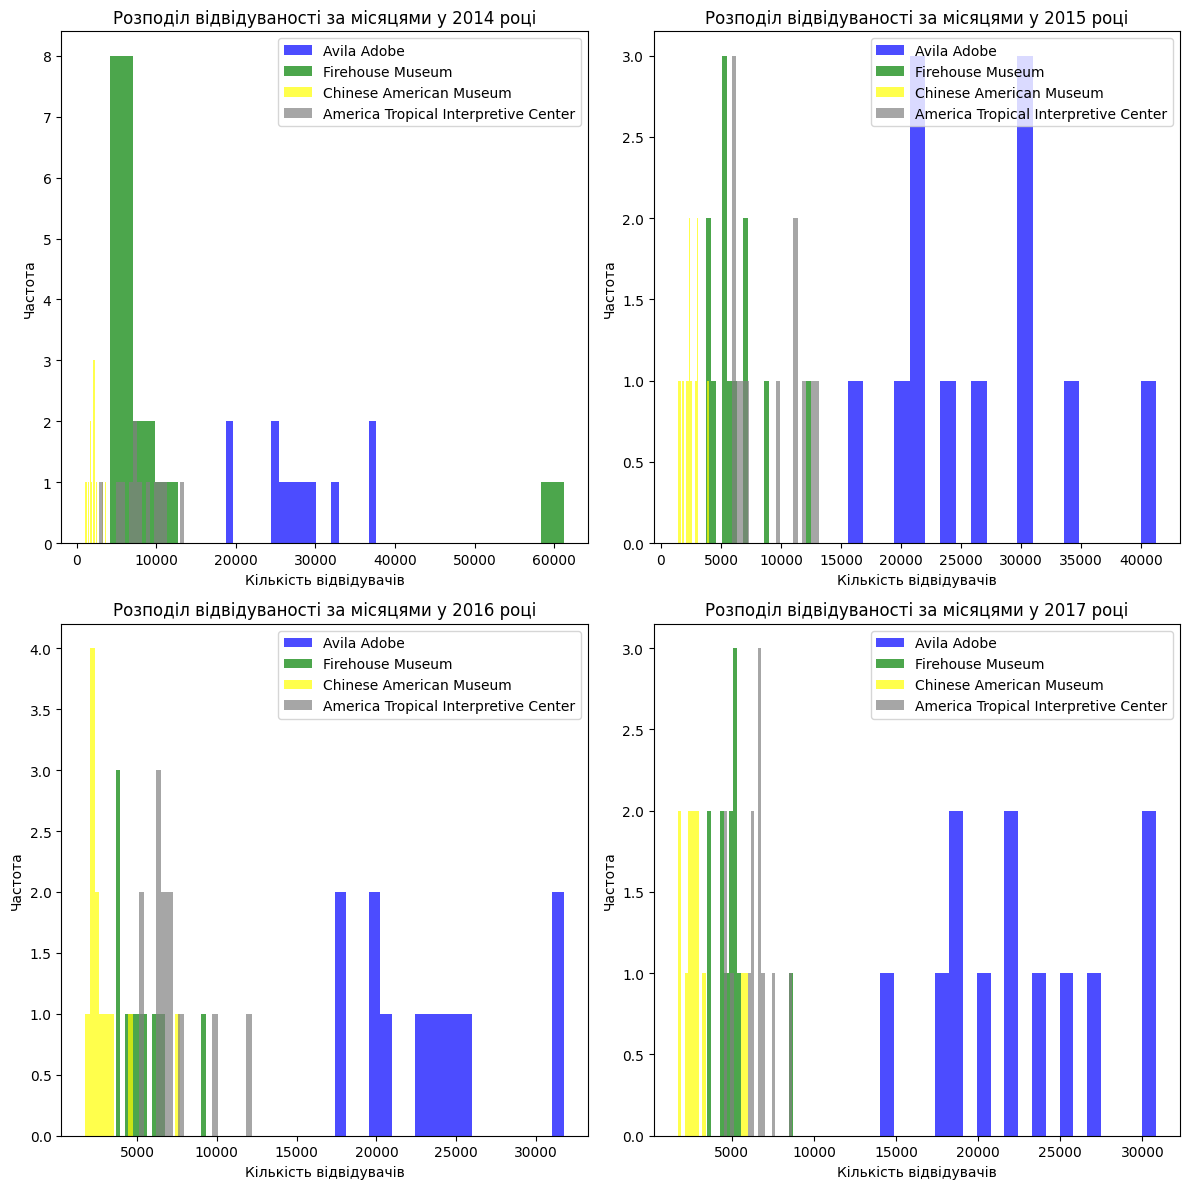

In [128]:
plt.figure(figsize=(12, 12))

# Колірний палітра для графіків
colors = ['blue', 'green', 'yellow', 'gray']

# Завантаження датасету знову, щоб забезпечити відокремленість даних для різних частин
data = pd.read_csv('museum_visitors.csv')
data['Date'] = pd.to_datetime(data['Date'])

for i, year in enumerate([2014, 2015, 2016, 2017]):
    plt.subplot(2, 2, i+1)
    data_year = data[data['Date'].dt.year == year]
    for j, museum in enumerate(data.columns[1:]):
        plt.hist(data_year[museum], bins=20, color=colors[j], alpha=0.7, label=museum)

    plt.xlabel('Кількість відвідувачів')
    plt.ylabel('Частота')
    plt.title(f'Розподіл відвідуваності за місяцями у {year} році')
    plt.legend()

plt.tight_layout()
plt.show()

Висновок:

Під час аналізу даних ми провели низку операцій, включаючи завантаження датасету, вивід перших рядків, попередній аналіз, обробку пропусків та дублікатів, а також виконання обчислень та візуалізацію результатів. Ми мали можливість ознайомитися з різними аспектами аналізу та візуалізації даних, що є важливою складовою роботи з ними. Результати цього аналізу можуть бути використані для подальших досліджень або прийняття рішень, пов'язаних з управлінням музеями та їхньою відвідуваністю. 
Загалом, результати аналізу та візуалізації даних надають нам краще розуміння динаміки відвідуваності музеїв та можливість виявити можливі залежності між різними факторами. Наші роздуми та аналіз допомагають нам приймати більш обґрунтовані рішення на основі наданої інформації.